# Twitter

Para manipulação de dados, é possível trabalhar com diversas fontes. Neste exemplo vamos ver como utilizar o twitter e trabalhar com os dados que são retornados por lá.

In [2]:
#Instalação dos pacotes
install.packages("twitteR")
install.packages("gsubfn")
install.packages("wordcloud")
install.packages("NLP")
install.packages("tm")
install.packages("igraph")
install.packages("httr", dependencies = TRUE)
install.packages("base64enc")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘rjson’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proto’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘slam’, ‘BH’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lazyeval’, ‘rex’, ‘promises’, ‘later’, ‘covr’, ‘httpuv’, ‘jpeg’, ‘png’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
#Carregamento dos pacotes
library(data.table)
library('twitteR')
library(igraph)
library(gsubfn)
library(wordcloud)
library(NLP)
library(tm)
library(base64enc)
library(httr)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: proto

Warning message:
“no DISPLAY variable so Tk is not available”
Loading required package: RColorBrewer


Attaching package: ‘httr’


The following object is masked from ‘package:NLP’:

    content




## Autenticando no Twitter

In [4]:
options(httr_oauth_cache=T)

consumer_key = "z0CK6HYX10UUQg2aZfQ384OQc" #API Key
consumer_secret = "TqpBdeGCCGZJczALUR46aW8xdfz4HGHYUI0qaqfu7Ek1p9q2GD" #API Secret Key
access_key = "18213124-qgs1h4qFZj7bmDs0O9Pnwb7KbOb6vxjZobliPmLjj" #Access Token
access_secret = "QO6moAMqaV6nssRBS3ectFZxHUo3etgM9SZKGklpKSJzJ" #Access Token Secret

setup_twitter_oauth(consumer_key, consumer_secret, access_key, access_secret)

[1] "Using direct authentication"


Adding .httr-oauth to .gitignore



Para validar se a autenticação está realmente funcionando, vamos retornar a *localização* e a *descrição* de um @ qualquer. Peguei o meu para garantir que existe.

In [5]:
usuario <- "rodglins"
perfil <- getUser(usuario)

location(perfil)

description(perfil)

[1] "Brasil"

[1] ""

## Retorno de dados

### Dados do perfil 

In [6]:
seguidores <- perfil$getFollowers()
length(seguidores)
seguidores <- rbindlist(lapply(seguidores,as.data.frame))


[1] 96

In [7]:
head(seguidores)

description,statusesCount,followersCount,favoritesCount,friendsCount,url,name,created,protected,verified,screenName,location,lang,id,listedCount,followRequestSent,profileImageUrl
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dttm>,<lgl>,<lgl>,<chr>,<chr>,<lgl>,<chr>,<dbl>,<lgl>,<chr>
"Cientista social, admirador de dados e café!!",172,158,6682,2828,NA,Anderson Denardin,2014-02-04 06:23:13,FALSE,FALSE,MrDenardin,"Santa Maria, Brasil",NA,2323342936,0,FALSE,http://pbs.twimg.com/profile_images/1242259050726928390/3PQf3pQv_normal.jpg
"Writer, librarian with interest in AI, semantics, gadgets, informational references, Jedi capabilities, Design, Movies, Photo, Travel and politics...",12738,680,41864,1627,https://t.co/3Gn4bBw2gh,João Pedro Moraes,2008-06-10 21:08:46,FALSE,FALSE,joaopedromoraes,São Paulo-Brasil,NA,15077785,17,FALSE,http://pbs.twimg.com/profile_images/2507792905/4aa674h1yxu7wcj1y1fz_normal.jpeg
"trabalhamos com construções, reformas, manutenção e reparos residenciais e prediais no segmento civil",39,130,2,1580,https://t.co/gXy38mBf8k,anderson reformas,2016-03-22 01:22:14,FALSE,FALSE,anderso92594602,"Nova Lima, Brasil",NA,712086954528133120,0,FALSE,http://pbs.twimg.com/profile_images/722592207132323840/dgDGQcEJ_normal.jpg
,0,12,0,274,NA,马库斯,2015-10-24 21:10:19,FALSE,FALSE,K00Uyq,"Centro, Curitiba",NA,4034290522,0,FALSE,http://pbs.twimg.com/profile_images/658028579725422592/pL_KgnwI_normal.jpg
,94,48,3922,839,NA,EmanuelGFG,2011-08-02 12:55:50,TRUE,FALSE,egfergue,,NA,347210102,0,FALSE,http://pbs.twimg.com/profile_images/1215844805516853248/_IQzCoYL_normal.jpg
@vaniawatanabe,1184,39,61,3468,NA,vania Watanabe,2009-08-29 14:01:06,FALSE,FALSE,vaniawatanabe,Brazil,NA,69873080,0,FALSE,http://pbs.twimg.com/profile_images/1356740256364720135/2Z_q2A8C_normal.jpg


In [8]:
quemSigo <- perfil$getFriends()
length(quemSigo)
quemSigo <- rbindlist(lapply(quemSigo,as.data.frame))


[1] 79

In [9]:
head(quemSigo)

description,statusesCount,followersCount,favoritesCount,friendsCount,url,name,created,protected,verified,screenName,location,lang,id,listedCount,followRequestSent,profileImageUrl
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dttm>,<lgl>,<lgl>,<chr>,<chr>,<lgl>,<chr>,<dbl>,<lgl>,<chr>
"Get Free Crypto Currencies from all of our free sites. We offer Free BTC, ETH, XRP, NEM, ADA, USDT, USDC, Binance Coin, Tron, Dash, NEO, LINK, LTC and Doge.",17163,143578,45654,310,https://t.co/TfLfaHh2xS,Free Cryptos,2017-10-26 11:18:24,FALSE,FALSE,cryptosfaucets,,NA,923509107499372544,167,FALSE,http://pbs.twimg.com/profile_images/1006585015877165056/cLBGiL8R_normal.jpg
,637,172,3,292,NA,Aline Alnt,2009-06-05 14:40:11,TRUE,FALSE,alinealnt,,NA,44905678,11,FALSE,http://pbs.twimg.com/profile_images/1025805172289822720/02Mx1Vz__normal.jpg
@BITMAINtech's official Twitter account for #Antminer and other hardware sold on https://t.co/EyIKZI9Vxq Follow me for the latest announcements and offers.,420,13692,66,41,https://t.co/EyIKZI9Vxq,Antminer_main,2018-06-06 08:20:00,FALSE,FALSE,Antminer_main,Beijing,NA,1004276707853914112,95,FALSE,http://pbs.twimg.com/profile_images/1008589595112452096/yubS_Veo_normal.jpg
Bibliotecária - UEPB/Campina Grande. Praticante de Kendo Paraíba/Brasil,1061,155,30,343,http://t.co/Rf08owQ3RL,Nilda Medeiros,2009-06-26 21:45:29,TRUE,FALSE,nildamedeiros,Brasil,NA,51240353,3,FALSE,http://pbs.twimg.com/profile_images/747209132437049345/zNFAobD-_normal.jpg
"Mulher femista, meio velha, de esquerda, ateia, bibliotecária, funcionária da USP. Rabugenta. Gosto de cinema, literatura, gatos e praia. E de escrever.",1103,447,41,223,https://t.co/MUiNtmFbbt,Marina Macambyra,2010-07-04 18:39:37,FALSE,FALSE,MarinaMacambyra,São Paulo,NA,162803330,15,FALSE,http://pbs.twimg.com/profile_images/1271816854403796994/pzUtZ8Mu_normal.jpg
,3704,267,2403,530,NA,anita,2008-02-29 01:50:20,TRUE,FALSE,anita22,São Paulo - Brasil,NA,14058577,17,FALSE,http://pbs.twimg.com/profile_images/970515610517073920/cwXthtbo_normal.jpg


E para analisar os meus seguidores que tem mais seguidores?

In [10]:

SeguidoresQueTemMaisSeguidores <- seguidores[ order(-seguidores$followersCount) ,]
top10Seguidores <- head(SeguidoresQueTemMaisSeguidores,10 )

top10Seguidores <- top10Seguidores [,c('name', 'followersCount', 'screenName', 'location', 'profileImageUrl')]

print(top10Seguidores)

                                      name followersCount      screenName
 1:                             DCE da USP           4561        dcedausp
 2:                            paulamacedo           2718       paulinhah
 3:             Tudo menos o véio da havan           1999         luciano
 4:                         MURAKAMI Tiago           1827      trmurakami
 5:                         Maurício Costa           1461   costamauricio
 6: Alexandre Berbe (アレクサンドルベルベ)           1357        AleBerbe
 7:                         Blog do Ônibus           1058    blogdoonibus
 8:                       Juliana Santiago           1058 julianasantiago
 9:                                   SNBU            980            SNBU
10:                          Seminário FLC            854 seminario_mundo
              location
 1:       USP | Brasil
 2:  São Paulo, Brasil
 3:           Fakeland
 4:          São Paulo
 5:     São Paulo - SP
 6:  Sao Paulo, Brazil
 7: São Paulo, Capital
 8:     São 

E das pessoas que eu sigo, quais tem mais seguidores?

In [11]:
SigoQueTemMaisSeguidores <- quemSigo[ order(-quemSigo$followersCount) ,]
top10quemSigo <- head(SigoQueTemMaisSeguidores,10 )

top10quemSigo <- top10quemSigo [,c('name', 'followersCount', 'screenName', 'location', 'profileImageUrl')]

print(top10quemSigo)

                                         name followersCount     screenName
 1:                              Free Cryptos         143578 cryptosfaucets
 2:                        Biblioteca Virtual          27041           bvsp
 3:                             Antminer_main          13692  Antminer_main
 4:                               paulamacedo           2718      paulinhah
 5:                             Luiz Milanesi           2699   LuisMilanesi
 6: Regina Fazioli #VACINADA 🐊🇧🇷🐊 #VACINAJÁ           2371      refazioli
 7:                Tudo menos o véio da havan           1999        luciano
 8:                                    moreno           1856     morenovski
 9:                            MURAKAMI Tiago           1827     trmurakami
10:    Alexandre Berbe (アレクサンドルベルベ)           1357       AleBerbe
             location
 1:                  
 2: São Paulo, Brazil
 3:           Beijing
 4: São Paulo, Brasil
 5:         São Paulo
 6:         São Paulo
 7:          Fakeland


## Retorno de tweets 

Retonar os ultimos tweets das pessoas que me seguem

In [12]:
tweets <- as.data.frame(matrix(c(NA,NA), nrow=1,ncol=2))

ultimosTweets <- 1
dez <- length(top10Seguidores$screenName)
i <- 1
while (i <= dez)
{
   tweets <- rbind(tweets, as.data.frame( matrix(c(top10Seguidores[i]$screenName,
      userTimeline(top10Seguidores[i]$screenName, n=ultimosTweets)[[1]]$text
      ) ,nrow=ultimosTweets, ncol=2, byrow=T) )
      )
  i <- i + 1
}
colnames(tweets) <- c("Perfil", "Post")
tweetsSeguidores <- tweets[!is.na(tweets$Perfil),]

View(tweetsSeguidores)

,Perfil,Post
,<chr>,<chr>
2,dcedausp,Obrigada por participarem do tuitaço! A luta pelos nossos direitos dentro e fora da universidade não começa nem ter… https://t.co/FO8DZfPyUX
3,paulinhah,Você se lembra de quando ingressou no Twitter? Eu me lembro! #MeuAniversárioNoTwitter https://t.co/PcYnehdYiZ
4,luciano,Nos EUA e no Brasil otários elegeram racistas misóginos homofóbicos negacionistas que espalharam mentiras sobre a C… https://t.co/0cVSdkZJQD
5,trmurakami,"Roger Guedes, mal te conheço, mas já te considero pacas."
6,costamauricio,https://t.co/Bmq22NqyrN
7,AleBerbe,#PauloFreire 💜 https://t.co/DcGW1WYkZA
8,blogdoonibus,Promotoria e concessionários fazem reunião para debater melhorias no transporte em SP http://t.co/N626hofgVt http://t.co/2RLnHYgRrW
9,julianasantiago,Direto do túnel do tempo. #ENEBDPR #Morretes #2003 https://t.co/6XEGYSxw87
10,SNBU,RT @MultiSystems_: SNBU sucesso total...!!!


E também, os ultimos tweets das pessoas que eu sigo

In [13]:
tweets <- as.data.frame(matrix(c(NA,NA), nrow=1,ncol=2))

ultimosTweets <- 1
dez <- length(top10quemSigo$screenName)
i <- 1
while (i <= dez)
{
  tweets <- rbind(tweets, as.data.frame( matrix(c(top10quemSigo[i]$screenName,
                                                  userTimeline(top10quemSigo[i]$screenName, n=ultimosTweets)[[1]]$text
  ) ,nrow=ultimosTweets, ncol=2, byrow=T) )
  )
  i <- i + 1
}
colnames(tweets) <- c("Perfil", "Post")
tweetsQuemSigo <- tweets[!is.na(tweets$Perfil),]

View(tweetsQuemSigo)

,Perfil,Post
,<chr>,<chr>
2,cryptosfaucets,FREE ROLL PROMO CODE** (Enter after you roll) Promo Code = 0pd8jre56f Valid until 22:00pm 27-SEP-21 GMT
3,bvsp,▶️Informamos que os serviços da Biblioteca Virtual do Governo do Estado de São Paulo foram descontinuados em abril/… https://t.co/GgDXaEb1vM
4,Antminer_main,Happy Mid-Autumn Festival! Wishing you all a splendid holiday to celebrate with your family and loved ones!… https://t.co/W5JXkVax2N
5,paulinhah,Você se lembra de quando ingressou no Twitter? Eu me lembro! #MeuAniversárioNoTwitter https://t.co/PcYnehdYiZ
6,LuisMilanesi,"Vejo tantas pessoas alegres, desprotegidas e sem medo aparente do vírus que suponho terem o mesmo sentimento que ap… https://t.co/3Hudzb9L7u"
7,refazioli,#Nãoénão #ESTUPRONAFAZENDA https://t.co/Yl1XwL21tR
8,luciano,Nos EUA e no Brasil otários elegeram racistas misóginos homofóbicos negacionistas que espalharam mentiras sobre a C… https://t.co/0cVSdkZJQD
9,morenovski,"@trmurakami pipocou uns seguros digitais, recebo promo no instagram. não fiz esse ano mas considerando próximo. pra… https://t.co/7SpkFLr4iR"
10,trmurakami,"Roger Guedes, mal te conheço, mas já te considero pacas."


Seguidores com a mesma localização que a minha 

In [14]:
SeguidoresNaMesmaLocalizacaoQueEu <- as.data.frame( seguidores[seguidores$location == location(perfil),] )
head(SeguidoresNaMesmaLocalizacaoQueEu$name,10)

[1] "Amanda Andrade"      "Nilda Medeiros"      "Tia da Biblioteca"  
[4] "Cristiane Shirayama" "Felipe Guerra"

Quem eu sigo que também está com a mesma localização

In [15]:
QuemSigoNaMesmaLocalizacaoQueEu <- as.data.frame( quemSigo[quemSigo$location == location(perfil),] )
head(QuemSigoNaMesmaLocalizacaoQueEu$name,10)


[1] "Nilda Medeiros"      "Felipe Guerra"       "Cristiane Shirayama"
[4] "Tia da Biblioteca"   "Organizobibliotecas"

## Buscas de Tweets


In [16]:
#Função para limpar texto
CaracteresParaMudar <- list( 'S'='S', 's'='s', 'Z'='Z', 'z'='z', 'À'='A', 'Á'='A', 'Â'='A', 'Ã'='A', 'Ä'='A', 'Å'='A', 'Æ'='A', 'Ç'='C', 'È'='E', 'É'='E',
                             'Ê'='E', 'Ë'='E', 'Ì'='I', 'Í'='I', 'Î'='I', 'Ï'='I', 'Ñ'='N', 'Ò'='O', 'Ó'='O', 'Ô'='O', 'Õ'='O', 'Ö'='O', 'Ø'='O', 'Ù'='U',
                             'Ú'='U', 'Û'='U', 'Ü'='U', 'Ý'='Y', 'Þ'='B', 'ß'='Ss', 'à'='a', 'á'='a', 'â'='a', 'ã'='a', 'ä'='a', 'å'='a', 'æ'='a', 'ç'='c',
                             'è'='e', 'é'='e', 'ê'='e', 'ë'='e', 'ì'='i', 'í'='i', 'î'='i', 'ï'='i', 'ð'='o', 'ñ'='n', 'ò'='o', 'ó'='o', 'ô'='o', 'õ'='o',
                             'ö'='o', 'ø'='o', 'ù'='u', 'ú'='u', 'û'='u', 'ý'='y', 'ý'='y', 'þ'='b', 'ÿ'='y' )


LimparTexto <- function(texto){
  texto <- gsub("\\s?(f|ht)(tp)(s?)(://)([^\\.]*)[\\.|/](\\S*)", texto, replacement="")
  texto <- gsub("\n", texto, replacement=" ")
  texto <- gsub(pattern="[[:punct:]]", texto, replacement="")
  
  texto <- tolower(texto)
  texto <- gsubfn(paste(names(CaracteresParaMudar),collapse='|'), CaracteresParaMudar, texto)

  texto <- removeWords(texto, stopwords("portuguese"))    
  return(texto)
}

prepararNuvem <- function()
{
  docs <- Corpus(VectorSource(postsLimpos))
  dtm <- TermDocumentMatrix(docs)
  m <- as.matrix(dtm)
  v <- sort(rowSums(m),decreasing=TRUE)
  d <- data.frame(word = names(v),freq=v)
  return(d)
}

In [18]:
#Busca por termo específico
#**************************
totalTweets = 1000
termo <- "#DataEngineer"
desde <- "2019-01-01"
idioma <- 'en'

posts <- searchTwitter(termo, n=totalTweets, since=desde, lang = idioma) 
posts <- twListToDF(posts)

Warning message in doRppAPICall("search/tweets", n, params = params, retryOnRateLimit = retryOnRateLimit, :
“1000 tweets were requested but the API can only return 353”


In [19]:
head(posts)

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
,<chr>,<lgl>,<dbl>,<chr>,<dttm>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<lgl>,<lgl>,<chr>,<chr>
1,[JOB ALERT] Implementation Engineers is hiring a #DataEngineer Consultant / #SeniorDataEngineer. This is a remote p… https://t.co/JQryRj0MbP,FALSE,0,NA,2021-09-25 20:10:20,TRUE,NA,1441857624870379521,NA,"<a href=""http://www.oneupapp.io"" rel=""nofollow"">OneUp App</a>",icrunchdata,0,FALSE,FALSE,NA,NA
2,"We have recently launched a new #opensource #software tool, #dbtvault, that automates the generation of #DataVault… https://t.co/xskA1oqYlv",FALSE,0,NA,2021-09-25 19:35:00,TRUE,NA,1441848729812799490,NA,"<a href=""https://www.semrush.com/"" rel=""nofollow"">Semrush Social Media Tool</a>",DataVault_UK,0,FALSE,FALSE,NA,NA
3,Providing Valuable Data to a Business as a Data Engineer #dataengineer #datawarehouse #bigdata https://t.co/w7Quz6cdMS,FALSE,0,NA,2021-09-25 17:18:01,FALSE,NA,1441814257096658944,NA,"<a href=""http://www.placeholder.com"" rel=""nofollow"">Lewis Gavin</a>",GavLaaaaaaaa,0,FALSE,FALSE,NA,NA
4,RT @kdnuggets: How I became a #DataEngineer from scratch https://t.co/2emXNTwJB6 https://t.co/td4dbNzjb8,FALSE,0,NA,2021-09-25 15:59:15,FALSE,NA,1441794435356901388,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",AnantPAwasthi,10,TRUE,FALSE,NA,NA
5,"Senior Advisor , #DataEngineer - Cloud Engineer - CVS https://t.co/Asc0CnSO8C H/T: @CVSHealthJobs",FALSE,0,NA,2021-09-25 14:40:38,FALSE,NA,1441774651319877637,NA,"<a href=""https://help.twitter.com/en/using-twitter/how-to-tweet#source-labels"" rel=""nofollow"">OpenStatistics.org</a>",saqibali_ca,0,FALSE,FALSE,NA,NA
6,RT @parmardarshil07: How To Get Data Engineering Internships or Jobs For Freshers ➡️https://t.co/AEkoMB71Nv #dataengineer #dataengineerin…,FALSE,0,NA,2021-09-25 13:19:04,FALSE,NA,1441754123704037388,NA,"<a href=""https://help.twitter.com/en/using-twitter/how-to-tweet#source-labels"" rel=""nofollow"">Pythonista Bot</a>",iPythonistaBot,1,TRUE,FALSE,NA,NA


In [20]:
postsLimpos <- as.vector( as.character( LimparTexto(posts$text) ) )

head(postsLimpos)

[1] "job alert implementation engineers is hiring  dataengineer consultant  seniordataengineer this is  remote p"
[2] "we have recently launched  new opensource software tool dbtvault that automates the generation of datavault"
[3] "providing valuable data to  business   data engineer dataengineer datawarehouse bigdata"                    
[4] "rt kdnuggets how i became  dataengineer from scratch"                                                       
[5] "senior advisor  dataengineer  cloud engineer  cvs  ht cvshealthjobs"                                        
[6] "rt parmardarshil07 how to get data engineering internships or jobs  freshers    dataengineer dataengineerin"

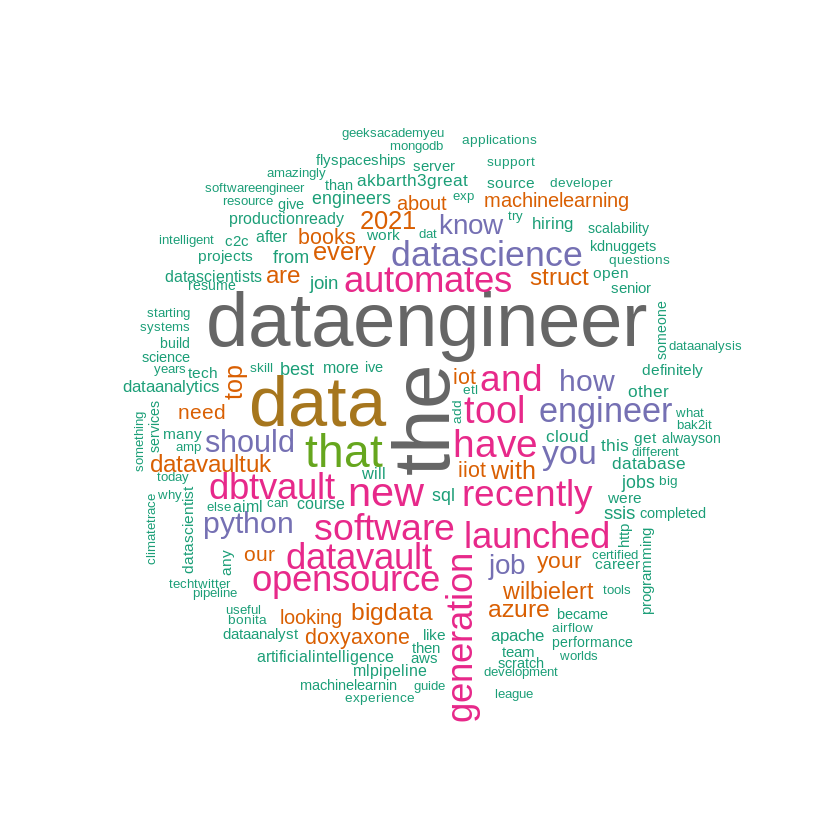

In [21]:
d <- prepararNuvem()

wordcloud(words = d$word, freq = d$freq, min.freq = 1
          ,max.words=150
          ,random.order=FALSE
          ,colors=brewer.pal(8, "Dark2") )

In [22]:
nomeArquivo <- "NuvemPalavras.png"

png(nomeArquivo, width=1024, height=1024, units="px", res=150)
    wordcloud(words = d$word, freq = d$freq, min.freq = 1
              ,max.words=150
              ,random.order=FALSE
              ,colors=brewer.pal(8, "Dark2") )
dev.off()

png 
  2